In [ ]:
%matplotlib notebook
import matplotlib.pylab as plt

import numpy as np
import pandas as pd

In [ ]:
t0_utc="2020-04-28T14:34:33"
t1_rel_days=-1
t2_rel_days=1.5
source_name="SGR 1935+2154"

In [ ]:
t0_ijd = float(ic.converttime("UTC", t0_utc, "IJD"))

In [7]:
import astropy.io.fits as fits
from astropy import units as u
from astropy import constants as const


In [99]:
from astropy.coordinates import SkyCoord
from astroquery.simbad import Simbad
t=Simbad.query_object(source_name)
source_coord = SkyCoord(t[0]['RA'], t[0]['DEC'], unit=("hourangle", "deg"))
source_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (293.732, 21.89672222)>

In [20]:
import numpy as np

In [66]:
import importlib
import integralclient as ic
importlib.reload(ic)
ic.__file__

selecting timesystem endpoint https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/
failed to import oda
selecting timesystem endpoint https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/
failed to import oda


'/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/integralclient.py'

In [395]:
tref_ijd = float(ic.converttime("UTC", "2020-04-28T00:00:00", "IJD"))

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/UTC/2020-04-28T00:00:00/IJD


In [306]:
scwlist=[s.strip() for s in open("/mnt/sshfs/isdc-in01//unsaved_data/savchenk/sgr1935/scwlist").readlines()]
scwlist

['222000000020.000',
 '222000010010.000',
 '222000020010.000',
 '222000030010.000',
 '222000040010.000',
 '222000050010.000',
 '222000060010.000',
 '222000070010.000',
 '222000080010.000',
 '222000090010.000',
 '222000100010.000',
 '222000110010.000',
 '222000120010.000',
 '222000130010.000',
 '222000140010.000',
 '222000150010.000',
 '222000160010.000',
 '222000170010.000',
 '222000180010.000',
 '222000190010.000',
 '222000200010.000',
 '222000210010.000',
 '222000220010.000',
 '222000230010.000',
 '222000240010.000',
 '222000250010.000',
 '222000260010.000',
 '222000270010.000',
 '222000280010.000',
 '222000290010.000',
 '222000300010.000',
 '222000310010.000',
 '222000320010.000',
 '222000330010.000',
 '222000340010.000',
 '222000350010.000',
 '222000360010.000',
 '222000370010.000',
 '222000380010.000',
 '222000390010.000',
 '222000400010.000',
 '222000410010.000',
 '222000420010.000',
 '222000430010.000',
 '222000440010.000',
 '222000450010.000',
 '222000460010.000',
 '22200047001

In [166]:
from collections import defaultdict
import glob
from astropy.wcs import WCS


In [529]:
lcs={}
scwmeta=defaultdict(dict)

for scwid in scwlist:
    try:
        lc_fn = "/mnt/sshfs/isdc-in01//unsaved_data/savchenk/data/reduced/ddcache//byscw/"+scwid[:4]+"/"+scwid+"/ii_light.v0/a0cd0c87/lcr.fits.gz"
        res_fn = glob.glob("/mnt/sshfs/isdc-in01//unsaved_data/savchenk/data/reduced/ddcache//byscw/"+scwid[:4]+"/"+scwid+"/ii_skyimage*/*/*res*")[0]
        ima_fn = glob.glob("/mnt/sshfs/isdc-in01//unsaved_data/savchenk/data/reduced/ddcache//byscw/"+scwid[:4]+"/"+scwid+"/ii_skyimage*/*/*ima*")[0]
    
        f = fits.open(lc_fn)        
        f_ima = fits.open(ima_fn)
    except Exception as e:
        print("no:", scwid, repr(e))
        continue
        
    W = WCS(f_ima[4].header)
        
        
    for e in f[2:]:
        dt_ms = int(e.header['TIMEDEL']*24*3600*1000)

        n = e.header['NAME']

        k = (dt_ms, n)
        
        

        if k not in lcs:
            lcs[k] = e.data.copy()
        else:
            lcs[k] = np.concatenate([lcs[k], e.data.copy()])
            
        scwmeta[k][scwid] = dict(e.header)
        scwmeta[k][scwid]['MEAN_RATE'] = np.nanmean(e.data['RATE'])
        scwmeta[k][scwid]['MEAN_RATE_ERR'] = np.nanmean(e.data['ERROR'])
        scwmeta[k][scwid]['WCS'] = W
        scwmeta[k][scwid]['SGR_IN_IMAGE'] = list(zip(*W.wcs_world2pix([source_coord.ra.deg], [source_coord.dec.deg], 0)))[0]
        scwmeta[k][scwid]['RATE_99P'] = np.nanpercentile(e.data['RATE'], 99)
        scwmeta[k][scwid]['RATE_STD'] = np.nanstd(e.data['RATE'])
        
    

no: 222000000020.000 IndexError('list index out of range',)
no: 222000010010.000 IndexError('list index out of range',)


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


no: 222000270010.000 FileNotFoundError(2, 'No such file or directory')
no: 222000980010.000 IndexError('list index out of range',)
no: 222000990010.000 IndexError('list index out of range',)
no: 222100010010.000 IndexError('list index out of range',)
no: 222100600010.000 IndexError('list index out of range',)
no: 222100660010.000 FileNotFoundError(2, 'No such file or directory')
no: 222100920010.000 IndexError('list index out of range',)
no: 222100930010.000 IndexError('list index out of range',)
no: 222200010010.000 IndexError('list index out of range',)
no: 222200970010.000 IndexError('list index out of range',)
no: 222300010010.000 IndexError('list index out of range',)
no: 222300030010.000 FileNotFoundError(2, 'No such file or directory')
no: 222300950010.000 IndexError('list index out of range',)
no: 222300960010.000 IndexError('list index out of range',)
no: 222400000020.000 IndexError('list index out of range',)
no: 222400010010.000 IndexError('list index out of range',)
no: 222

In [433]:
for s,v in scwmeta[(100,'SGR 1935+2154')].items():
    print("\n", s)
    
    if '22240027' not in s: continue
    
    m_scw = lc['TIME']>v['TSTART']
    m_scw &= lc['TIME']<v['TSTOP']
    
    t = lc['TIME'][m_scw]
    r = lc['RATE'][m_scw]
    re = lc['ERROR'][m_scw]
    
    print("got values", len(t))
    if len(t)==0: continue
    
    excessvar = np.nanstd(r)/np.nanmedian(re)
    print(excessvar)
    if excessvar<1: excessvar=1
    
    snr = r/re/excessvar
        
    pcs = snr>SNR
    
    if sum(pcs)==0:
        print("no peaks")
        continue
    else:
        print("found peaks", sum(pcs))



 222000020010.000

 222000030010.000

 222000040010.000

 222000050010.000

 222000060010.000

 222000070010.000

 222000080010.000

 222000090010.000

 222000100010.000

 222000110010.000

 222000120010.000

 222000130010.000

 222000140010.000

 222000150010.000

 222000160010.000

 222000170010.000

 222000180010.000

 222000190010.000

 222000200010.000

 222000210010.000

 222000220010.000

 222000230010.000

 222000240010.000

 222000250010.000

 222100020010.000

 222100030010.000

 222100040010.000

 222100050010.000

 222100060010.000

 222100070010.000

 222100080010.000

 222100090010.000

 222100100010.000

 222100110010.000

 222100120010.000

 222100130010.000

 222100140010.000

 222100150010.000

 222100160010.000

 222100170010.000

 222100180010.000

 222100190010.000

 222100200010.000

 222100210010.000

 222100220010.000

 222100260010.000

 222200020010.000

 222200030010.000

 222200040010.000

 222200050010.000

 222200060010.000

 222200070010.000

 2222000800

/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater


In [444]:
# detection

lc = lcs[(100,'SGR 1935+2154')]

SNR=7.
excesses = []

for s,v in scwmeta[(100,'SGR 1935+2154')].items():
    print("\n", s)
    
    m_scw = lc['TIME']>v['TSTART']
    m_scw &= lc['TIME']<v['TSTOP']
            
    t = lc['TIME'][m_scw]
    r = lc['RATE'][m_scw]
    re = lc['ERROR'][m_scw]
    
    print("VIGNET", v['VIGNET'])
    
    if v['VIGNET']<0.01:
        print("skipping for vignet")
        continue
    
    print("got values", len(t))
    if len(t)==0: continue
    
    excessvar = np.nanstd(r)/np.nanmedian(re)
    print(excessvar)
    if excessvar<1: excessvar=1
    
    snr = r/re/excessvar
        
    pcs = snr>SNR
    
    if sum(pcs)==0:
        print("no peaks")
        continue
    else:
        print("found peaks", sum(pcs))

    
    pcs_ijd = t[pcs]
    pcs_snr = (r/re)[pcs]

    gp=[[pcs_ijd[0], pcs_snr[0],1]]

    for i,s in zip(pcs_ijd[1:], pcs_snr[1:]):
        sep = (i-gp[-1][0])*24*3600
        if sep<5.:
            gp[-1][2]+=1
            gp[-1][1] = np.max([s, gp[-1][1]])
        else:
            print("large sep", sep)
            gp.append([i,s,1])

    excesses+=gp
            
pcs_ijd, pcs_snr, pcs_n = map(np.array, zip(*excesses))



 222000020010.000
VIGNET 0.413231830660919
got values 18629
0.7505917
no peaks

 222000030010.000
VIGNET 0.334756726521533
got values 18000
0.7005848
no peaks

 222000040010.000
VIGNET 0.255741655672992
got values 17930
0.79171485


/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater


no peaks

 222000050010.000
VIGNET 0.170496846950343
got values 18000
0.86526215
no peaks

 222000060010.000
VIGNET 0.0754616453720303
got values 17580
0.9805437
no peaks

 222000070010.000
VIGNET 0.0536035545296727
got values 17950
0.9836292
no peaks

 222000080010.000
VIGNET 0.127242608563805
got values 17970
0.9081606
no peaks

 222000090010.000
VIGNET 0.184425984451053
got values 18000
0.867732
no peaks

 222000100010.000
VIGNET 0.246876552911758
got values 18000
0.7980362
no peaks

 222000110010.000
VIGNET 0.318399497327967
got values 18000
0.9288139
no peaks

 222000120010.000
VIGNET 0.2133595648042
got values 17580
0.8320765
no peaks

 222000130010.000
VIGNET 0.170759050730759
got values 17800
0.8610663
no peaks

 222000140010.000
VIGNET 0.128444538528441
got values 17960
0.8988643
no peaks

 222000150010.000
VIGNET 0.0814969132962915
got values 18000
0.9628671
no peaks

 222000160010.000
VIGNET 0.0280211784213691
got values 18000
1.0240393
no peaks

 222000170010.000
VIGNET 0.0

no peaks

 222300090010.000
VIGNET 0.075992995945569
got values 19985
0.9607137
no peaks

 222300100010.000
VIGNET 0.0334240887857007
got values 19995
1.0006247
no peaks

 222300160010.000
VIGNET 0.00374609098955148
skipping for vignet

 222300170010.000
VIGNET 0.0216800561371429
got values 19856
1.0252405
no peaks

 222300180010.000
VIGNET 0.0430179686738938
got values 19936
0.99532884
no peaks

 222300190010.000
VIGNET 0.00523212654756833
skipping for vignet

 222300330010.000
VIGNET 0.038524119557735
got values 19970
1.0171206
no peaks

 222300340010.000
VIGNET 0.104137443631529
got values 20006
0.9403796
no peaks

 222300350010.000
VIGNET 0.0762938287784536
got values 19666
0.99914294
no peaks

 222300360010.000
VIGNET 0.0335425649754129
got values 20006
1.013738
no peaks

 222300420010.000
VIGNET 0.00255576532481427
skipping for vignet

 222300430010.000
VIGNET 0.0229270626555689
got values 19871
1.0251616
no peaks

 222300440010.000
VIGNET 0.0430456890817794
got values 19766
0.99

In [675]:
# DM estimate

DM=332.81
DM_err=0.1

nu=400*u.MHz

dt_dm_s = (4.15*u.ms*DM/(nu/u.GHz)**2).to(u.s).value
dt_dm_err_s = (4.15*u.ms*DM_err/(nu/u.GHz)**2).to(u.s).value
dt_dm_s, dt_dm_err_s

print("dm difference", dt_dm_s)

radiotopo_s=(6300.*u.km/const.c).to(u.s).value

t0_dmcorr_ijd = t0_ijd - dt_dm_s/24/3600.
t0_dmcorr_utc = ic.converttime("IJD", t0_dmcorr_ijd, "UTC")


t_refplot_utc = "2020-04-28T14:34:24.0"
t_refplot_ijd = float(ic.converttime("UTC", t_refplot_utc, "IJD"))
t_refplot_ijd

dm difference 8.632259375000002
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.6080272192202756/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/UTC/2020-04-28T14:34:24.0/IJD


7423.608022962963

<IPython.core.display.Javascript object>


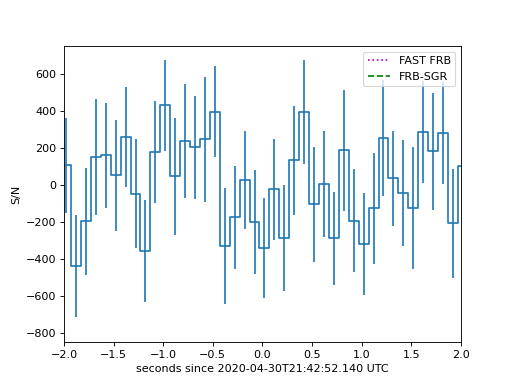

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7425.9047701415374831/ANY
2020-04-30T21:43:00.500
FAST nutinf ISOT 2020-04-30T21:42:52.140
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/UTC/2020-04-30T21:42:52.140/IJD


In [674]:
from astropy.time import Time


plt.figure()

fast_mjd = 58969.9048669008

ic.converttime("IJD", fast_mjd - 51544 - 8.36/24/3600, "ANY")

fast_isot = Time(fast_mjd, scale="utc", format='mjd').isot
print(fast_isot)

fast_nuinf_isot = Time(fast_mjd - 8.36/24/3600, scale="utc", format='mjd').isot
print("FAST nutinf ISOT", fast_nuinf_isot)

fast_nuinf_ijd = float(ic.converttime("UTC", fast_nuinf_isot, "IJD"))


lc = lcs[(100, 'SGR 1935+2154')]

t_rel = ((lc['TIME']-fast_nuinf_ijd)*24*3600)
m = np.abs(t_rel)<3

t_rel = t_rel[m]
rate = lc['RATE'][m]
error = lc['ERROR'][m]

plt.errorbar(
    t_rel,
    rate,
    error,
    ds="steps-mid",
)

plt.scatter((pcs_ijd-tref_ijd)*24, pcs_snr,c='r')
plt.axvline((fast_frb_ijd-tref_ijd)*24, c='m', ls=':', label="FAST FRB")
plt.axvline((t0_ijd - tref_ijd)*24, c='g', ls='--', label="FRB-SGR")
plt.legend()



plt.xlim([-2,2])
plt.xlabel("seconds since %s UTC"%fast_nuinf_isot)
plt.ylabel("S/N")

#plt.savefig("sgr1935_lc_hours.pdf")
#!pwd

plt.show()

In [438]:
fast_frb_ijd

7425.904866900797

In [530]:
for scwid, sm in scwmeta[(100, 'SGR 1935+2154')].items():
    print(scwid, sm['SGR_IN_IMAGE'])
    img_center = sm['WCS'].wcs_pix2world([[200, 200]], 0)
    off_axis = SkyCoord(img_center, unit='deg').separation(source_coord)
    print(off_axis.deg)
    sm['img_center'] = img_center
    sm['off_axis_deg'] = off_axis.deg


222000020010.000 (248.4652509463008, 257.32866910267666)
[6.15276222]
222000030010.000 (274.91857493377154, 252.3964245751141)
[7.47909573]
222000040010.000 (301.42640139712785, 247.3018485574644)
[9.12951916]
222000050010.000 (328.0780646956789, 242.0671427577889)
[10.95552483]
222000060010.000 (355.08885343474094, 236.76633243028576)
[12.89077697]
222000070010.000 (360.8838424121427, 262.56576078745957)
[13.92053592]
222000080010.000 (333.4646795038747, 268.0395670792923)
[12.13952813]
222000090010.000 (306.5762520395699, 273.5379700922214)
[10.53256768]
222000100010.000 (279.83091850105154, 278.6943599001676)
[9.14410565]
222000110010.000 (253.2551164971605, 283.6271467487887)
[8.10260967]
222000120010.000 (258.62307675345727, 310.02796369451056)
[10.14939431]
222000130010.000 (285.63772103333304, 305.02266717517597)
[11.01100725]
222000140010.000 (312.64142079392116, 299.8004839429791)
[12.19332841]
222000150010.000 (339.84537000951013, 294.4144606797571)
[13.61863692]
222000160010

<IPython.core.display.Javascript object>


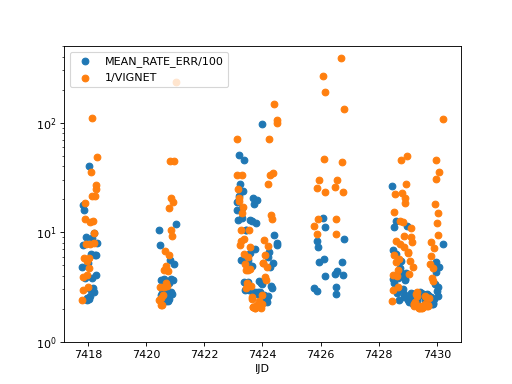

In [451]:
plt.figure()

plt.scatter(
    [m['TSTART'] for s,m in scwmeta[(100,  'SGR 1935+2154')].items()],
    [m['MEAN_RATE_ERR']/100. for s,m in scwmeta[(100,  'SGR 1935+2154')].items()],
#    [m['VIGNET'] for s,m in scwmeta[(100,  'SGR 1935+2154')].items()],
    label="MEAN_RATE_ERR/100"
)

plt.scatter(
    [m['TSTART'] for s,m in scwmeta[(100,  'SGR 1935+2154')].items()],
    [1./m['VIGNET'] for s,m in scwmeta[(100,  'SGR 1935+2154')].items()],
    label="1/VIGNET"
)


[(m['MEAN_RATE_ERR'],m['VIGNET'],[]) for s,m in scwmeta[(100,  'SGR 1935+2154')].items()]

plt.ylim([1,500])
plt.semilogy()

plt.legend()

plt.xlabel("IJD")
plt.savefig("draft/PAPER_SGR1935_INTEGRAL/fig/diagnostic//observations.pdf")
plt.savefig("draft/PAPER_SGR1935_INTEGRAL/fig/diagnostic//observations.png")



In [531]:
import yaml
totals=dict(
    tstart_ijd=min([(sm['TSTART']) for s,sm in scwmeta[(100,  'SGR 1935+2154')].items() if sm['MEAN_RATE_ERR']]),
    tstop_ijd=max([(sm['TSTOP']) for s,sm in scwmeta[(100,  'SGR 1935+2154')].items() if sm['MEAN_RATE_ERR']]),
    ontime_days=sum([(sm['TSTOP']-sm['TSTART']) for s,sm in scwmeta[(100,  'SGR 1935+2154')].items() if sm['MEAN_RATE_ERR']])
)

totals['tstart_utc'] = ic.converttime("IJD", totals['tstart_ijd'], "UTC")
totals['tstop_utc'] = ic.converttime("IJD", totals['tstop_ijd'], "UTC")

totals['ontime_ks'] = totals['ontime_days']*24*3600/1000.

yaml.dump(totals, open("draft/PAPER_SGR1935_INTEGRAL/data/total/observations.yaml", "w"))

totals

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7417.7887851437299105/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7430.2299990845003776/UTC


{'tstart_ijd': 7417.78878514373,
 'tstop_ijd': 7430.2299990845,
 'ontime_days': 4.155975385517195,
 'tstart_utc': '2020-04-22T18:54:41.852',
 'tstop_utc': '2020-05-05T05:30:02.736',
 'ontime_ks': 359.07627330868564}

In [453]:
sel = np.abs((pcs_ijd-tref_ijd)*24 - 6.13)<0.1
ic.converttime("IJD", pcs_ijd[sel][0], "ANY")

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.2562053841720626/ANY


{'CCSDS': '6407216345579061440 58eb0151c55100c0',
 'IJD': '7423.2562053841720626',
 'IJS': '641369336.145192503929',
 'MJD': '58967.256205384168',
 'OBT': '9030465215996370',
 'REVNUM': '2222',
 'SCWID': '222200080010',
 'TAI': '641369368.329192519188',
 'TT': '641369336.145192503929',
 'UTC': '2020-04-28T06:07:46.961',
 'YYYYDDDHH': '202011906'}

In [427]:
recent_crab_cts = 254.71825
crab_flux = 1.3e-8

In [608]:
_bursts=[]



for b in bursts.iloc:        
    _burst = b.to_dict()
    t = ic.converttime("IJD", _burst['ijd'], "ANY")
    
    _burst['utc_integral'] = t['UTC']
    _burst['scw'] = t['SCWID']
    _burst['scwinfo'] = scwmeta[(100,  'SGR 1935+2154')][_burst['scw']+".000"]
    _burst['scwinfo']['WCS'] = None
    _burst['sc'] = ic.get_sc(_burst['utc_integral'], ra=source_coord.ra.deg, dec=source_coord.dec.deg)
    
    _burst['detections'] = []
    _burst['integral_detections'] = ['ISGRI offline']
    
    if '28T14:34' in _burst['utc_integral']:
        _burst['integral_detections'] += ["IBAS", "ACS", "CHIME", "STARE2"]

    if '28T09:51' in _burst['utc_integral']:
        _burst['integral_detections'] += ["IBAS"]
    
    _burst['detections'] += _burst['integral_detections']
    
        
    _bursts.append(_burst)
    

_bursts.append(
    dict(
        detections=['FAST'],        
    )
)

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.1590433861329075/ANY
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.1742643781471997/ANY
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.2483767183193777/ANY
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.2562053841720626/ANY
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.3366139923409719/ANY
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.4112725193954248/ANY
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.6080248525859133/ANY
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7424.2289670057034527/ANY


In [682]:

    
_bursts[-1]['ijd_geo'] = fast_nuinf_ijd #58969.9048669008-51544.
_bursts[-1]['times_geo']=ic.converttime("IJD", _bursts[-1]['ijd_geo'], "ANY") #??
_bursts[-1]['utc_geo']=_bursts[-1]['times_geo']['UTC']
_bursts[-1]['sc'] = ic.get_sc(_bursts[-1]['utc_geo'], ra=source_coord.ra.deg, dec=source_coord.dec.deg )

_bursts[-1]['ijd'] = _bursts[-1]['ijd_geo'] - _bursts[-1]['sc']['barytime']/24./3600
_bursts[-1]['times']=ic.converttime("IJD", _bursts[-1]['ijd'], "ANY") #??

_bursts[-1]['utc_integral']=_bursts[-1]['times']['UTC']
_bursts[-1]['scwid']=_bursts[-1]['times']['SCWID']

_bursts[-1]['off_axis_deg'] = _bursts[-1]['sc']['theta']

fast_burst = _bursts[-1]
_bursts[-1]

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7425.9055708796304316/ANY
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7425.9055700516910292/ANY


{'detections': ['FAST'],
 'ijd_geo': 7425.90557087963,
 'times_geo': {'CCSDS': '6407782972441493504 58ed04a9de2c0000',
  'IJD': '7425.9055708796304316',
  'IJS': '641598241.324000120163',
  'MJD': '58969.905570879630',
  'OBT': '9030705240289544',
  'REVNUM': '2223',
  'SCWID': '222300080010',
  'TAI': '641598273.508000135422',
  'TT': '641598241.324000120163',
  'UTC': '2020-04-30T21:42:52.140',
  'YYYYDDDHH': '202012121'},
 'utc_geo': '2020-04-30T21:42:52.140',
 'sc': {'barytime': 0.07153394011168558,
  'bodies': {'earth': {'body_dec': -53.575,
    'body_distance': 0,
    'body_in_sc': [80.17258899354536, -32.23568861131782],
    'body_ra': 18.889999999999986,
    'body_size': 4.313588777573248,
    'integral_parallax': 57.29577951308232,
    'separation': 84623.6},
   'moon': {'body_dec': -53.575,
    'body_distance': 376871.3911484997,
    'body_in_sc': [121.40601012484355, 100.74355526741367],
    'body_ra': 18.889999999999986,
    'body_size': 0.2927902713964379,
    'integral_pa

<IPython.core.display.Javascript object>


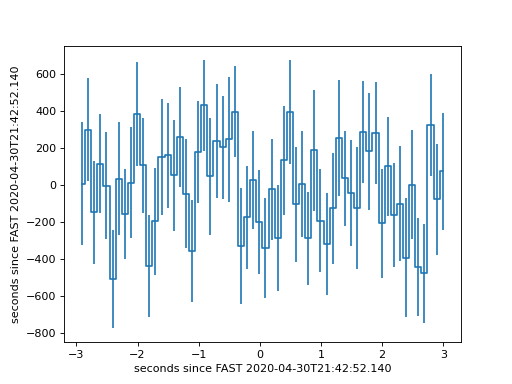

2.3204371393801965e-08

In [684]:
plt.figure()

t_rel_s = (lcs[(100,'SGR 1935+2154')]['TIME'] - fast_burst['ijd'])*24*3600

m = np.abs(t_rel_s)<3

plt.errorbar(
    t_rel_s[m],
    lcs[(100,'SGR 1935+2154')]['RATE'][m],
    lcs[(100,'SGR 1935+2154')]['ERROR'][m],
    ds='steps-mid'
)


plt.xlabel('seconds since FAST {}'.format(fast_burst['utc_geo']))
plt.ylabel('seconds since FAST {}'.format(fast_burst['utc_geo']))

#fast_burst['flux_lim']=""
fast_burst['flux_lim_cts'] =  np.nanmean(lcs[(100,'SGR 1935+2154')]['ERROR'][m]*10**0.5)*5
fast_burst['flux_lim_ecs'] =  fast_burst['flux_lim_cts']/recent_crab_cts * crab_flux
fast_burst['fluence_lim_ecs'] =  fast_burst['flux_lim_ecs']*0.1
fast_burst['fluence_lim_ecs']


In [616]:
for b in _bursts:
    print(b['detections'])

['ISGRI offline']
['ISGRI offline']
['ISGRI offline']
['ISGRI offline']
['ISGRI offline']
['ISGRI offline', 'IBAS']
['ISGRI offline', 'IBAS', 'ACS', 'CHIME', 'STARE2']
['ISGRI offline']
['ISGRI offline']
['ISGRI offline']
['ISGRI offline']
['ISGRI offline']
['FAST']


In [642]:
def simplify(x):
    if isinstance(x, np.ndarray):
        return simplify(list(x))
    
    #if isinstance(x, np.core.multiarray.scalar):
    #    return float(x)
    
    if isinstance(x, list):
        return [simplify(a) for a in x]
    
    if isinstance(x, tuple):
        return tuple([simplify(a) for a in x])


    if isinstance(x, dict):
        return {simplify(a):simplify(b) for a,b in x.items()}

    try:
        return float(x)
    except:
        return x
    
yaml.dump(simplify(_bursts), open("draft/PAPER_SGR1935_INTEGRAL/data/burst-search/bursts_search.yaml", "w"))

In [644]:
import ddaclient

d_bursts = yaml.load(open("draft/PAPER_SGR1935_INTEGRAL/data/burst-search/bursts.yaml"))

/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [645]:


obslog = []
obs_sep_days = 3./24.

for s in scwmeta[(100, 'SGR 1935+2154')]:
    so = scwmeta[(100, 'SGR 1935+2154')][s]
    so['WCS']=""    
    so['COMMENT']=""
    
    newobs = False
    
    if len(obslog)==0:        
        print("new first obs")
        newobs = True
    else:
        cur_obs_last = np.max([s['TSTOP'] for s in obslog[-1]['scws'].values()])
        if so['TSTOP'] > cur_obs_last + obs_sep_days:
            print("new obs sep", so['TSTOP']- cur_obs_last, "last obs was", len(obslog[-1]['scws']))
            newobs = True
        else:
            obslog[-1]['scws'][s]=so
        
    if newobs:
        obslog.append(
                        dict(
                            scws={s:so}
                        )
                     )
            
    
    
for o in obslog:
    o['tstart_ijd'] = np.min([s['TSTART'] for s in o['scws'].values()])
    o['tstop_ijd'] = np.max([s['TSTOP'] for s in o['scws'].values()])
    
    o['tstart_utc'] = ic.converttime("IJD", o['tstart_ijd'], "UTC")
    o['tstop_utc'] = ic.converttime("IJD", o['tstop_ijd'], "UTC")
    
    o['off_axis_min_deg'] = np.min([s['off_axis_deg'] for s in o['scws'].values()])
    o['off_axis_max_deg'] = np.max([s['off_axis_deg'] for s in o['scws'].values()])
    
    o['ontime_s'] = np.sum([s['ONTIME'] for s in o['scws'].values()])
    o['telapse_d'] = o['tstop_ijd'] - o['tstart_ijd']
    o['ontime_frac'] = o['ontime_s']/24./3600./o['telapse_d']
    
    
    o['n_isgri_bursts'] = len([b for b in d_bursts if o['tstart_ijd']<b['ijd']<o['tstop_ijd'] and 'bblocks' in b])
    
    o['notes'] = []
    
    orbits = set([s[:4] for s in o['scws'].keys()])
    assert len(orbits) == 1
    o['orbit'] = list(orbits)[0]
    o['pointings'] = list(sorted([int(s[4:8]) for s in o['scws'].keys()]))
    
    if len([b for b in d_bursts if o['tstart_ijd']<b['ijd']<o['tstop_ijd'] and 'CHIME' in b['detections']]):
        print("CHIME!")
        o['notes'].append("CHIME FRB")
    
    print("obs", o['tstart_utc'], o['tstop_utc'], o['off_axis_min_deg'], o['off_axis_max_deg'])
        
    

yaml.dump(simplify(scwmeta[(100, 'SGR 1935+2154')]), open("draft/PAPER_SGR1935_INTEGRAL/data/obslog/scwmeta.yaml", "w"))
yaml.dump(simplify(obslog), open("draft/PAPER_SGR1935_INTEGRAL/data/obslog/obslog.yaml", "w"))

new first obs
new obs sep 2.1500713224604624 last obs was 24
new obs sep 2.068751866169805 last obs was 22
new obs sep 1.242709340919646 last obs was 57
new obs sep 0.14768531008940045 last obs was 5
new obs sep 0.33104193239978486 last obs was 4
new obs sep 0.1476853003305223 last obs was 4
new obs sep 1.6626287489498282 last obs was 4
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7417.7887851437299105/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7418.3233457659898704/UTC
obs 2020-04-22T18:54:41.852 2020-04-23T07:44:27.890 6.15276221892367 16.98348360854237
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7420.4495281767003689/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7421.0631166468001538/UTC
obs 2020-04-25T10:46:10.050 2020-04-26T01:29:44.094 4.19223492691687 18.57

In [541]:
for s, so in list(scwmeta.values())[0].items():
    if so['off_axis_deg']<1:
        print(s)

222200300010.000
222400450010.000
222400460010.000
